# Problem Statement

## Determine which features are most important for predicting academic success of students.To predict the grade of students on bases of given features.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Data Collection
df=pd.read_csv('Student_performance_data _.csv')

In [3]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [4]:
#showing rows and columns of dataframe
df.shape

(2392, 15)

In [5]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

<Axes: xlabel='GradeClass', ylabel='count'>

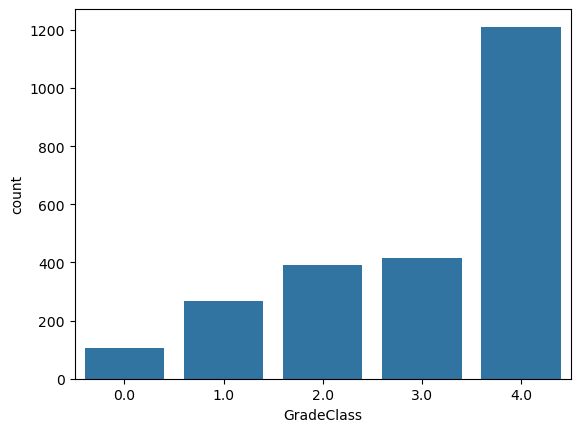

In [7]:
sns.countplot(x = df['GradeClass'])

In [8]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [9]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [10]:
#shows statical information
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [11]:
# check null values
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Check Outliers & Handel outliers

In [12]:
a=df.describe().columns
a

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

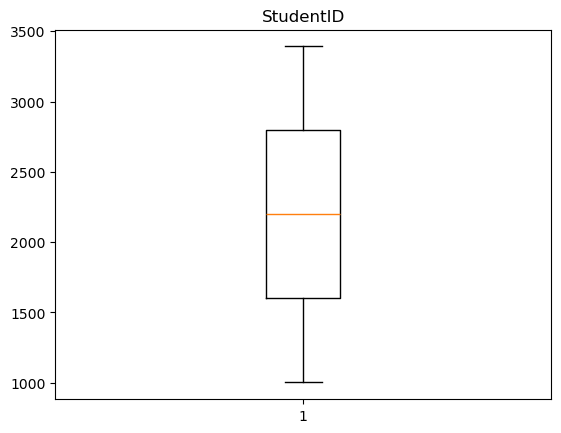

Q1= 1598.75
Q2= 2196.5
Q3= 2794.25
IQR= 1195.5
Upper_Whisker= 4587.5
Lower_Whisker= -194.5


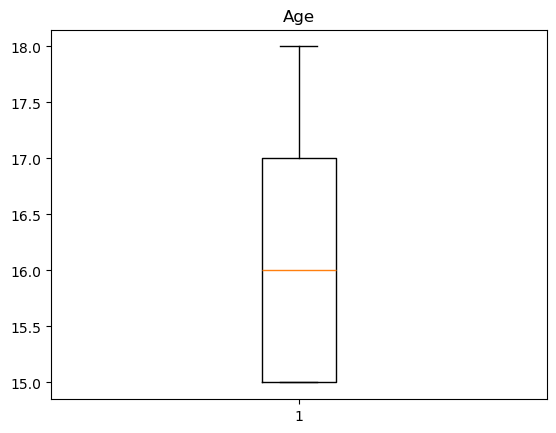

Q1= 15.0
Q2= 16.0
Q3= 17.0
IQR= 2.0
Upper_Whisker= 20.0
Lower_Whisker= 12.0


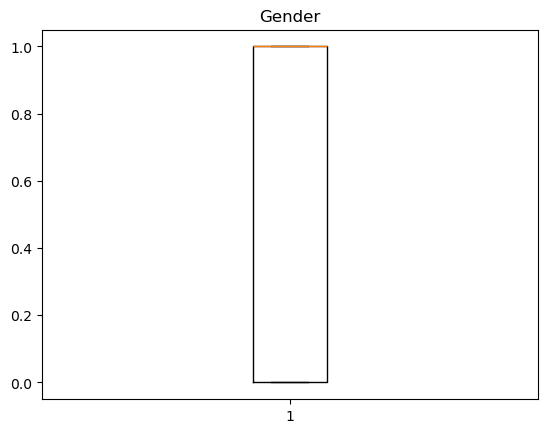

Q1= 0.0
Q2= 1.0
Q3= 1.0
IQR= 1.0
Upper_Whisker= 2.5
Lower_Whisker= -1.5


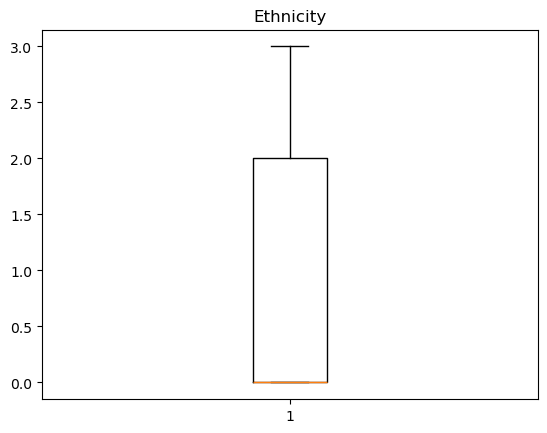

Q1= 0.0
Q2= 0.0
Q3= 2.0
IQR= 2.0
Upper_Whisker= 5.0
Lower_Whisker= -3.0


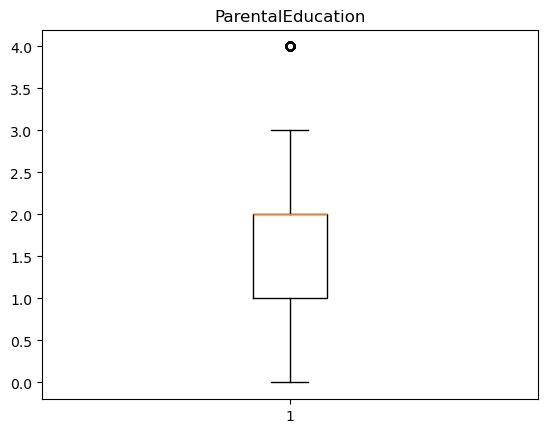

Q1= 1.0
Q2= 2.0
Q3= 2.0
IQR= 1.0
Upper_Whisker= 3.5
Lower_Whisker= -0.5


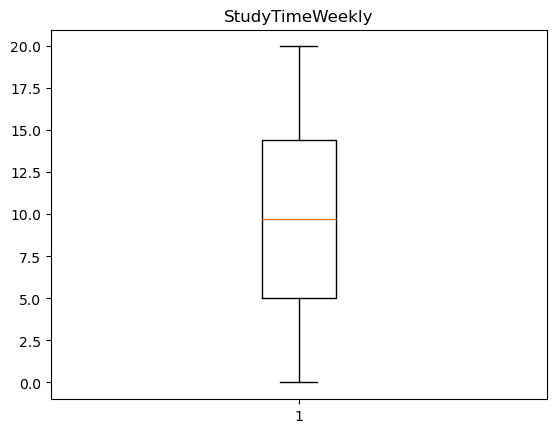

Q1= 5.043079161539899
Q2= 9.705363212574394
Q3= 14.408409547514031
IQR= 9.365330385974133
Upper_Whisker= 28.456405126475232
Lower_Whisker= -9.004916417421299


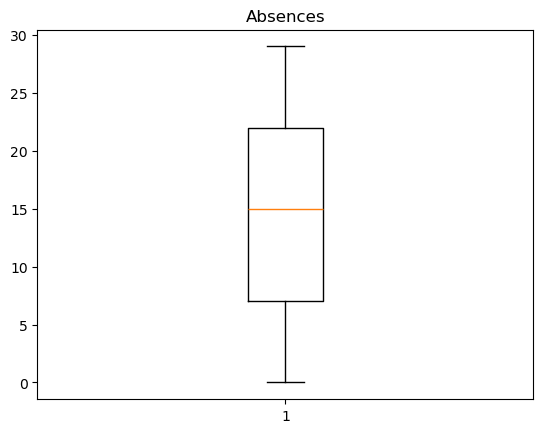

Q1= 7.0
Q2= 15.0
Q3= 22.0
IQR= 15.0
Upper_Whisker= 44.5
Lower_Whisker= -15.5


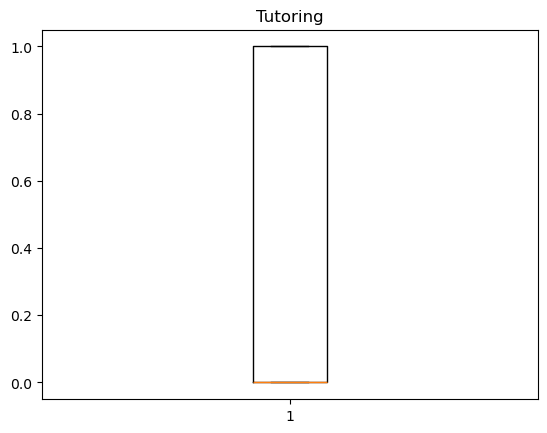

Q1= 0.0
Q2= 0.0
Q3= 1.0
IQR= 1.0
Upper_Whisker= 2.5
Lower_Whisker= -1.5


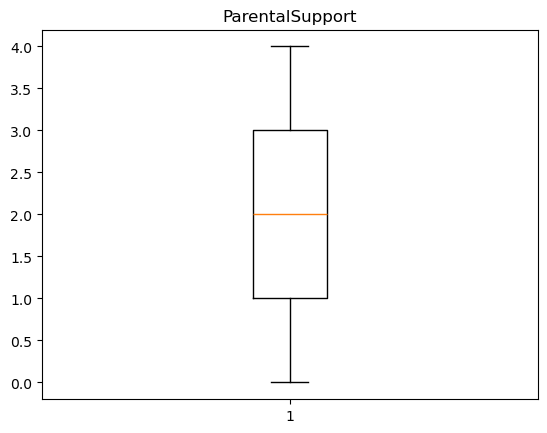

Q1= 1.0
Q2= 2.0
Q3= 3.0
IQR= 2.0
Upper_Whisker= 6.0
Lower_Whisker= -2.0


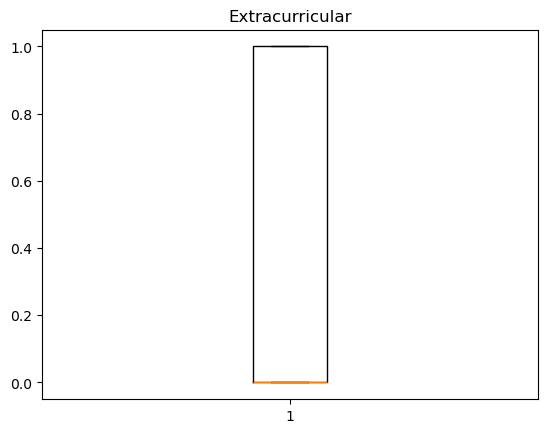

Q1= 0.0
Q2= 0.0
Q3= 1.0
IQR= 1.0
Upper_Whisker= 2.5
Lower_Whisker= -1.5


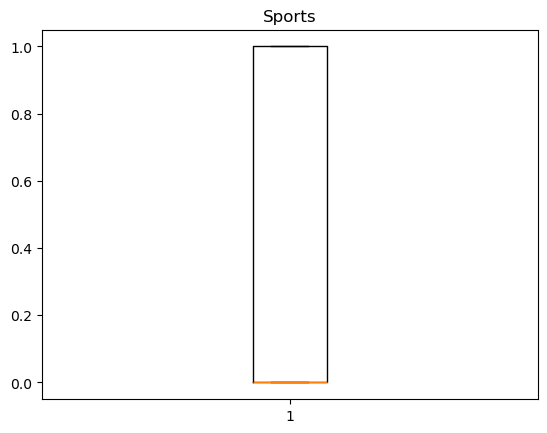

Q1= 0.0
Q2= 0.0
Q3= 1.0
IQR= 1.0
Upper_Whisker= 2.5
Lower_Whisker= -1.5


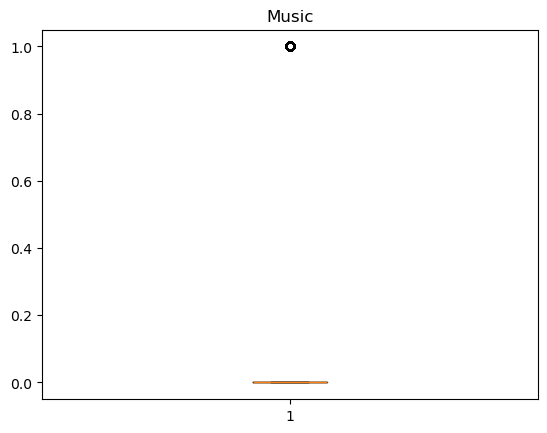

Q1= 0.0
Q2= 0.0
Q3= 0.0
IQR= 0.0
Upper_Whisker= 0.0
Lower_Whisker= 0.0


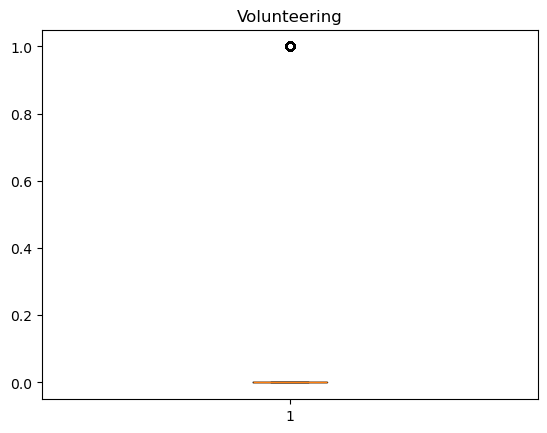

Q1= 0.0
Q2= 0.0
Q3= 0.0
IQR= 0.0
Upper_Whisker= 0.0
Lower_Whisker= 0.0


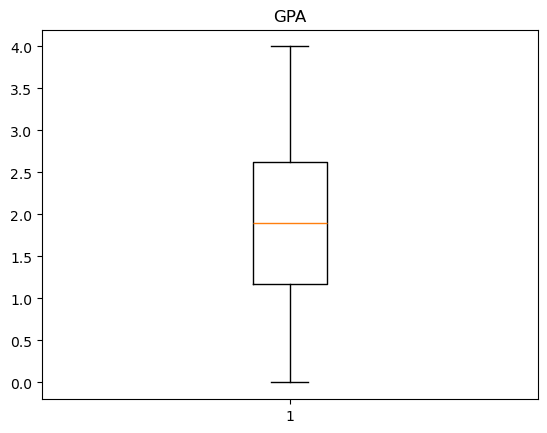

Q1= 1.1748034468836228
Q2= 1.8933926937866847
Q3= 2.622216170450785
IQR= 1.447412723567162
Upper_Whisker= 4.793335255801528
Lower_Whisker= -0.9963156384671206


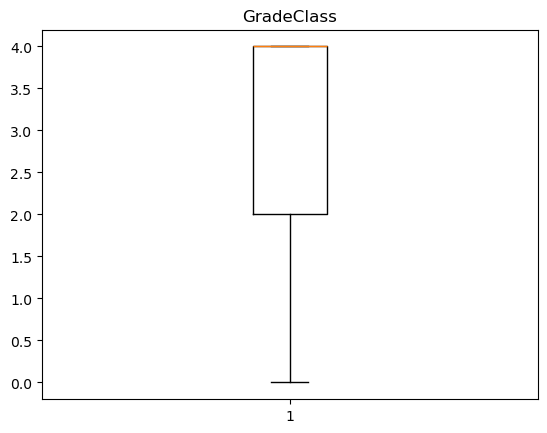

Q1= 2.0
Q2= 4.0
Q3= 4.0
IQR= 2.0
Upper_Whisker= 7.0
Lower_Whisker= -1.0


In [13]:
for i in a:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    
    upper_tail=q3+(1.5*iqr)
    lower_tail=q1-(1.5*iqr)

    print("Q1=",q1)
    print("Q2=",q2)
    print("Q3=",q3)
    print("IQR=",iqr)
    print("Upper_Whisker=",upper_tail)
    print("Lower_Whisker=",lower_tail)

In [14]:
#ParentalEducation---->this columns  have outliers

In [15]:
df['ParentalEducation'].value_counts()

ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64

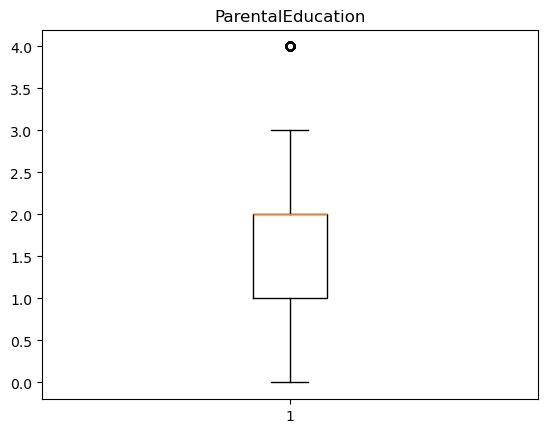

q1--- 1.0
q2--- 2.0
q3--- 2.0
iqr--- 1.0
uppertail--- 3.5
lowertail--- -0.5


In [16]:
#1)-ParentalEducation
plt.figure()
plt.boxplot(df['ParentalEducation'])
plt.title('ParentalEducation')
plt.show()

q1=df['ParentalEducation'].quantile(0.25)
q2=df['ParentalEducation'].quantile(0.50)
q3=df['ParentalEducation'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print("q1---",q1)
print("q2---",q2)
print("q3---",q3)
print("iqr---",iqr)
print("uppertail---",upper_tail)
print("lowertail---",lower_tail)

In [17]:
#find outliers and replace it with uppertail
df.loc[df['ParentalEducation']>upper_tail] 
df.loc[df['ParentalEducation']>upper_tail,'ParentalEducation']=upper_tail

## skewness

In [18]:
a=df.describe().columns
a

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [19]:
from scipy.stats import skew 

In [20]:
for i in a:
    print(i,skew(df[i]))

StudentID 0.0
Age 0.03577097473505741
Gender -0.04348853820356313
Ethnicity 0.758591256244093
ParentalEducation -0.0238923147927185
StudyTimeWeekly 0.050036669884928095
Absences -0.02600077249756051
Tutoring 0.8655013467366067
ParentalSupport -0.16675406978146617
Extracurricular 0.4797925729658726
Sports 0.8547164149261877
Music 1.5243821905457928
Volunteering 1.883669308601568
GPA 0.014516490896101894
GradeClass -0.900242251313216


## LabelEncoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Distinction is based on the number of different values in the column
columns = list(df.columns)
categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) >5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)
        

print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)

Numerical features:  ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']
Categorical features:  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [23]:
df[numeric_columns] = df[numeric_columns].astype('float64')

In [24]:
laben= LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categoric_columns]:  
    df[column] = laben.fit_transform(df[column])



## Scalling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
b=StandardScaler()


In [27]:
for i in numeric_columns:
    df[i]=b.fit_transform(df[[i]])
    print(i,skew(df[i]))

StudentID -9.50558843826221e-17
StudyTimeWeekly 0.05003666988492751
Absences -0.02600077249756062
GPA 0.014516490896101877


### shows correaltions in Features

In [28]:
df.corr()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


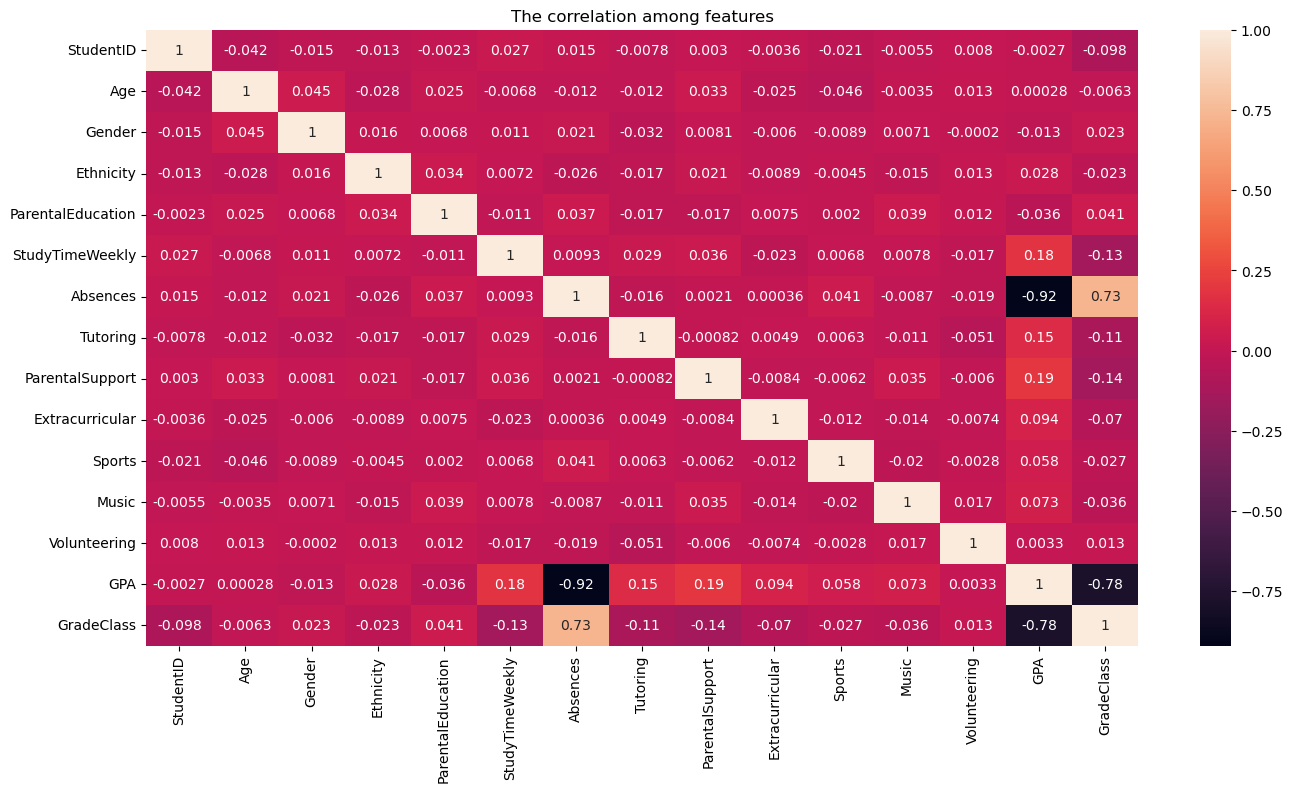

In [29]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('The correlation among features')
plt.show()


## Train Test Split

In [30]:
x=df.drop(columns=["GradeClass","StudentID","Age","GPA"],axis=1)
y=df['GradeClass']

In [31]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [123]:
x_train

,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
1036,1,2,3,-1.673021,0.172298,0,2,1,1,1,0
356,1,2,2,-0.934311,-1.481445,1,3,1,1,0,0
1345,0,2,1,-0.227230,-1.717694,0,3,0,0,0,0
835,1,0,1,-0.143070,1.117293,0,3,1,1,0,0
288,0,0,2,-0.407513,-1.245196,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
456,0,1,4,-0.576894,-1.008947,1,2,0,1,1,0
1921,1,2,3,-1.423848,0.526671,0,0,0,1,0,0
709,0,2,1,1.182139,0.526671,0,2,1,1,0,0
174,1,0,1,-0.563658,0.644796,1,1,1,0,0,0


In [124]:
y_train

1036    3
356     1
1345    1
835     4
288     2
       ..
456     1
1921    4
709     4
174     4
1146    4
Name: GradeClass, Length: 1913, dtype: int64

In [125]:
x_test

,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
1559,0,2,3,1.746332,0.290422,0,4,1,1,1,0
632,0,0,1,-0.819759,-0.063951,0,2,0,0,0,0
487,1,0,1,0.041612,-0.063951,0,2,0,0,0,1
1381,1,2,2,0.371952,1.471667,0,4,0,1,0,0
485,1,0,1,0.470185,0.762920,1,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1220,0,0,1,0.357879,1.707916,0,3,0,1,0,0
2203,1,1,2,-0.674570,-1.599569,1,2,1,0,0,0
98,0,0,3,-0.206751,1.235418,0,2,1,0,1,1
427,1,0,1,1.470153,0.526671,0,2,0,0,0,1


In [126]:
y_test

1559    3
632     4
487     4
1381    4
485     4
       ..
1220    4
2203    1
98      4
427     4
1722    4
Name: GradeClass, Length: 479, dtype: int64

## Model traning

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix


In [128]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
svm  = SVC()
rf=RandomForestClassifier()

## Model Evaulation

In [129]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Accuracy Score :",accuracy_score(y_test,y_pred))
    print("Classification report \n:", classification_report(y_test,y_pred))
    print("Multilabel COnfusion Matrix\n",multilabel_confusion_matrix(y_test, y_pred))

    train = model.score(x_train,y_train)
    test = model.score(x_test,y_test)

    print("Training score :",train)
    print("Testing score :",test)

    return model

In [130]:
mymodel(logreg)

Accuracy Score : 0.7766179540709812
Classification report 
:               precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.55      0.73      0.62        48
           2       0.66      0.53      0.59        78
           3       0.61      0.62      0.62        74
           4       0.90      0.96      0.93       260

    accuracy                           0.78       479
   macro avg       0.74      0.58      0.57       479
weighted avg       0.78      0.78      0.76       479

Multilabel COnfusion Matrix
 [[[460   0]
  [ 18   1]]

 [[402  29]
  [ 13  35]]

 [[380  21]
  [ 37  41]]

 [[376  29]
  [ 28  46]]

 [[191  28]
  [ 11 249]]]
Training score : 0.7260846837428123
Testing score : 0.7766179540709812


LogisticRegression()

In [131]:
mymodel(dt)

Accuracy Score : 0.6597077244258872
Classification report 
:               precision    recall  f1-score   support

           0       0.23      0.32      0.27        19
           1       0.43      0.38      0.40        48
           2       0.47      0.49      0.48        78
           3       0.45      0.54      0.49        74
           4       0.89      0.82      0.85       260

    accuracy                           0.66       479
   macro avg       0.49      0.51      0.50       479
weighted avg       0.68      0.66      0.67       479

Multilabel COnfusion Matrix
 [[[440  20]
  [ 13   6]]

 [[407  24]
  [ 30  18]]

 [[358  43]
  [ 40  38]]

 [[356  49]
  [ 34  40]]

 [[192  27]
  [ 46 214]]]
Training score : 1.0
Testing score : 0.6597077244258872


DecisionTreeClassifier()

In [132]:
mymodel(svm)

Accuracy Score : 0.7640918580375783
Classification report 
:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.53      0.62      0.57        48
           2       0.58      0.55      0.57        78
           3       0.61      0.64      0.62        74
           4       0.91      0.95      0.93       260

    accuracy                           0.76       479
   macro avg       0.53      0.55      0.54       479
weighted avg       0.73      0.76      0.75       479

Multilabel COnfusion Matrix
 [[[460   0]
  [ 19   0]]

 [[404  27]
  [ 18  30]]

 [[370  31]
  [ 35  43]]

 [[375  30]
  [ 27  47]]

 [[194  25]
  [ 14 246]]]
Training score : 0.774176685833769
Testing score : 0.7640918580375783


SVC()

In [133]:
mymodel(rf)

Accuracy Score : 0.7515657620041754
Classification report 
:               precision    recall  f1-score   support

           0       0.20      0.05      0.08        19
           1       0.61      0.52      0.56        48
           2       0.56      0.62      0.59        78
           3       0.54      0.58      0.56        74
           4       0.91      0.93      0.92       260

    accuracy                           0.75       479
   macro avg       0.56      0.54      0.54       479
weighted avg       0.74      0.75      0.74       479

Multilabel COnfusion Matrix
 [[[456   4]
  [ 18   1]]

 [[415  16]
  [ 23  25]]

 [[363  38]
  [ 30  48]]

 [[369  36]
  [ 31  43]]

 [[194  25]
  [ 17 243]]]
Training score : 1.0
Testing score : 0.7515657620041754


RandomForestClassifier()

# Best Model Is SVM

In [134]:
svm.fit(x_train, y_train)
model_score = svm.score(x_test, y_test)
y_pred = svm.predict(x_test)

print(model_score)


0.7640918580375783


# Hyperparameter Tunning

In [135]:
svm = SVC(kernel='linear')

In [136]:
mymodel(svm)

Accuracy Score : 0.791231732776618
Classification report 
:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.57      0.73      0.64        48
           2       0.66      0.60      0.63        78
           3       0.64      0.69      0.66        74
           4       0.92      0.95      0.93       260

    accuracy                           0.79       479
   macro avg       0.56      0.59      0.57       479
weighted avg       0.76      0.79      0.78       479

Multilabel COnfusion Matrix
 [[[460   0]
  [ 19   0]]

 [[405  26]
  [ 13  35]]

 [[377  24]
  [ 31  47]]

 [[376  29]
  [ 23  51]]

 [[198  21]
  [ 14 246]]]
Training score : 0.7496079456351281
Testing score : 0.791231732776618


SVC(kernel='linear')

In [137]:
svm = SVC(kernel='poly')

In [138]:
mymodel(svm)

Accuracy Score : 0.7682672233820459
Classification report 
:               precision    recall  f1-score   support

           0       1.00      0.16      0.27        19
           1       0.63      0.65      0.64        48
           2       0.63      0.53      0.57        78
           3       0.56      0.61      0.58        74
           4       0.88      0.95      0.92       260

    accuracy                           0.77       479
   macro avg       0.74      0.58      0.60       479
weighted avg       0.77      0.77      0.76       479

Multilabel COnfusion Matrix
 [[[460   0]
  [ 16   3]]

 [[413  18]
  [ 17  31]]

 [[377  24]
  [ 37  41]]

 [[370  35]
  [ 29  45]]

 [[185  34]
  [ 12 248]]]
Training score : 0.7642446419236801
Testing score : 0.7682672233820459


SVC(kernel='poly')

In [139]:
svm = SVC(kernel='sigmoid')

In [140]:
mymodel(svm)

Accuracy Score : 0.5594989561586639
Classification report 
:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.19      0.29      0.23        48
           2       0.24      0.15      0.19        78
           3       0.28      0.50      0.36        74
           4       0.92      0.79      0.85       260

    accuracy                           0.56       479
   macro avg       0.33      0.35      0.33       479
weighted avg       0.60      0.56      0.57       479

Multilabel COnfusion Matrix
 [[[459   1]
  [ 19   0]]

 [[373  58]
  [ 34  14]]

 [[363  38]
  [ 66  12]]

 [[309  96]
  [ 37  37]]

 [[201  18]
  [ 55 205]]]
Training score : 0.501829587036069
Testing score : 0.5594989561586639


SVC(kernel='sigmoid')

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
param_grid = {'C':[1,10],'gamma':[1,10]}

In [143]:
gs = GridSearchCV(svm,param_grid,verbose=3)

In [144]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......................C=1, gamma=1;, score=0.431 total time=   0.1s
[CV 2/5] END ......................C=1, gamma=1;, score=0.433 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.431 total time=   0.1s
[CV 4/5] END ......................C=1, gamma=1;, score=0.440 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.377 total time=   0.0s
[CV 1/5] END .....................C=1, gamma=10;, score=0.433 total time=   0.0s
[CV 2/5] END .....................C=1, gamma=10;, score=0.415 total time=   0.0s
[CV 3/5] END .....................C=1, gamma=10;, score=0.428 total time=   0.0s
[CV 4/5] END .....................C=1, gamma=10;, score=0.419 total time=   0.0s
[CV 5/5] END .....................C=1, gamma=10;, score=0.421 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=0.449 total time=   0.0s
[CV 2/5] END .....................C=10, gamma=1;,

GridSearchCV(estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [1, 10], 'gamma': [1, 10]}, verbose=3)

In [145]:
param_grid = {'C':[10],'gamma':[1]}

In [146]:
gs = GridSearchCV(svm,param_grid,verbose=3)

In [147]:
mymodel(svm)

Accuracy Score : 0.5594989561586639
Classification report 
:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.19      0.29      0.23        48
           2       0.24      0.15      0.19        78
           3       0.28      0.50      0.36        74
           4       0.92      0.79      0.85       260

    accuracy                           0.56       479
   macro avg       0.33      0.35      0.33       479
weighted avg       0.60      0.56      0.57       479

Multilabel COnfusion Matrix
 [[[459   1]
  [ 19   0]]

 [[373  58]
  [ 34  14]]

 [[363  38]
  [ 66  12]]

 [[309  96]
  [ 37  37]]

 [[201  18]
  [ 55 205]]]
Training score : 0.501829587036069
Testing score : 0.5594989561586639


SVC(kernel='sigmoid')

# Final Model

In [148]:
svm = SVC(kernel='linear',C=1.0,gamma=1)

In [149]:
mymodel(svm)

Accuracy Score : 0.791231732776618
Classification report 
:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.57      0.73      0.64        48
           2       0.66      0.60      0.63        78
           3       0.64      0.69      0.66        74
           4       0.92      0.95      0.93       260

    accuracy                           0.79       479
   macro avg       0.56      0.59      0.57       479
weighted avg       0.76      0.79      0.78       479

Multilabel COnfusion Matrix
 [[[460   0]
  [ 19   0]]

 [[405  26]
  [ 13  35]]

 [[377  24]
  [ 31  47]]

 [[376  29]
  [ 23  51]]

 [[198  21]
  [ 14 246]]]
Training score : 0.7496079456351281
Testing score : 0.791231732776618


SVC(gamma=1, kernel='linear')

# create pickel file

In [150]:
import pickle

In [151]:
with open('mymodel.pkl', 'wb') as file:
    pickle.dump(mymodel, file)


# Conclusion

A Support Vector Machine predicts the grade of students using the features provided with 79% accuracy on the test set with hyperparameter tuning.